<a href="https://colab.research.google.com/github/ishazzz/Machine_Learning_Projects/blob/main/MLAssignmnet03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implemented , compiled and fitted an artificial neural network on datasets.

evaluated the performance of both the neural network using appropriate evaluation matrix.

 Performed Hyper Parameter Tuning on both the networks.

# Print the network summary

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("/content/Housing - Housing.csv")

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4.0,2,3.0,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4.0,4,4.0,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3.0,2,2.0,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500.0,4.0,2,2.0,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420.0,4.0,1,2.0,yes,yes,NaN,no,yes,2,no,furnished


In [ ]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000.0,2.0,1,1.0,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400.0,3.0,1,1.0,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620.0,2.0,1,1.0,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910.0,3.0,1,1.0,no,no,no,no,no,0,no,furnished
544,1750000,3850.0,3.0,1,2.0,yes,no,no,no,no,0,no,unfurnished


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,539.000000,543.000000,545.000000,543.000000,545.000000
mean,4.766729e+06,5126.870130,2.963168,1.286239,1.804788,0.693578
std,1.870440e+06,2159.433198,0.738083,0.502470,0.869011,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3577.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4510.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              539 non-null    float64
 2   bedrooms          543 non-null    float64
 3   bathrooms         545 non-null    int64  
 4   stories           543 non-null    float64
 5   mainroad          544 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          543 non-null    object 
 8   hotwaterheating   543 non-null    object 
 9   airconditioning   542 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          543 non-null    object 
 12  furnishingstatus  539 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 55.5+ KB


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
df.shape

(545, 13)

(array([ 61., 163., 139.,  89.,  46.,  25.,  13.,   4.,   1.,   4.]),
 array([ 1750000.,  2905000.,  4060000.,  5215000.,  6370000.,  7525000.,
         8680000.,  9835000., 10990000., 12145000., 13300000.]),
 <BarContainer object of 10 artists>)

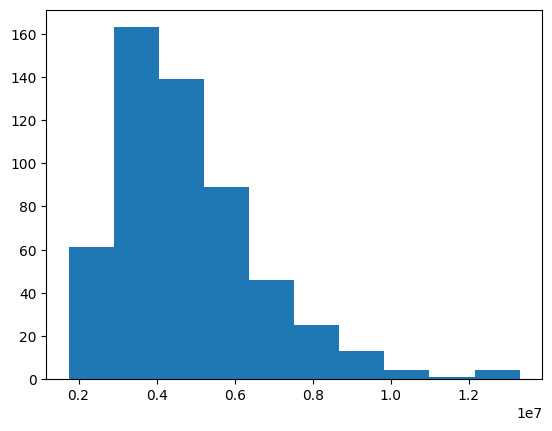

In [ ]:
plt.hist(df["price"])

(array([ 73., 198., 115.,  86.,  38.,  15.,   7.,   5.,   0.,   2.]),
 array([ 1650.,  3105.,  4560.,  6015.,  7470.,  8925., 10380., 11835.,
        13290., 14745., 16200.]),
 <BarContainer object of 10 artists>)

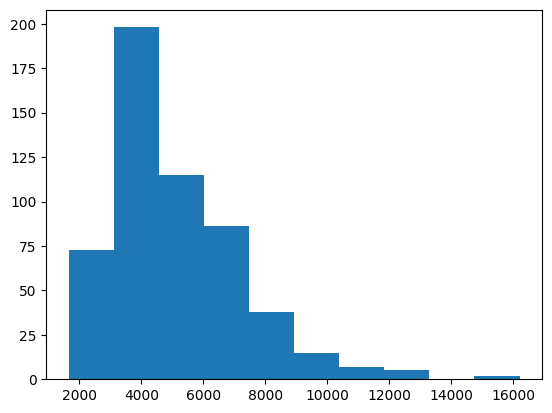

In [ ]:
plt.hist(df["area"])

(array([401.,   0.,   0., 133.,   0.,   0.,  10.,   0.,   0.,   1.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

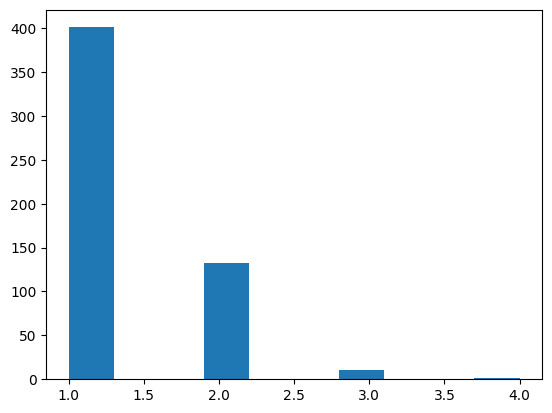

In [ ]:
plt.hist(df["bathrooms"])

(array([  2.,   0., 136.,   0., 299.,   0.,  94.,   0.,  10.,   2.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

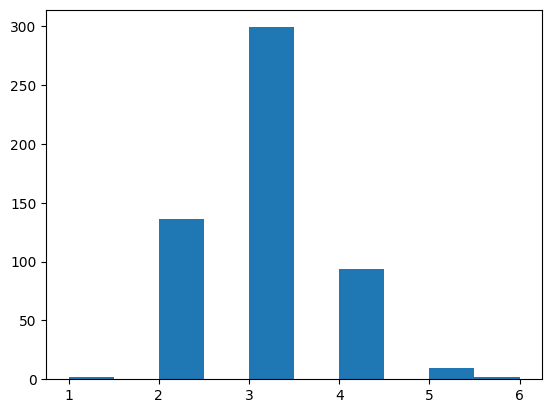

In [ ]:
plt.hist(df["bedrooms"])

(array([227.,   0.,   0., 236.,   0.,   0.,  39.,   0.,   0.,  41.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

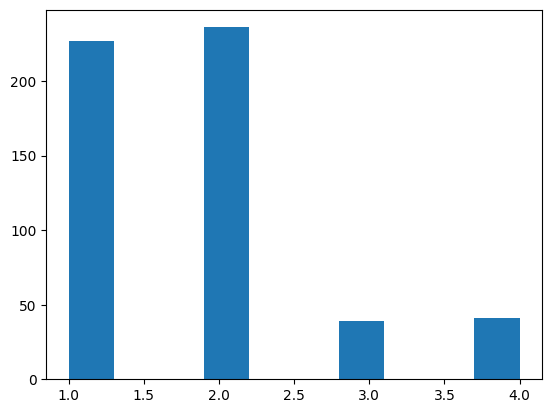

In [ ]:
plt.hist(df["stories"])

<Axes: xlabel='price', ylabel='Count'>

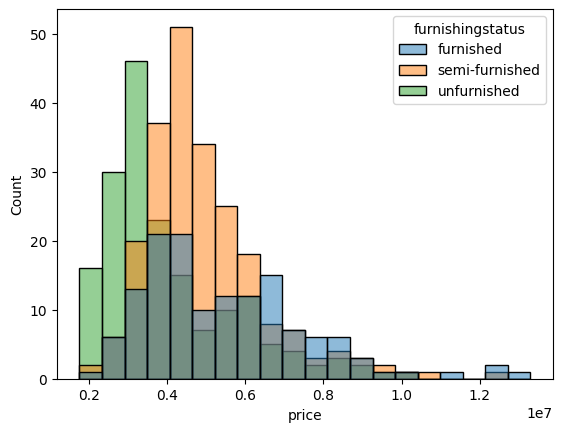

In [ ]:
sns.histplot(df, x=df['price'] , hue=df['furnishingstatus'],bins =20 )

<Axes: xlabel='price', ylabel='Count'>

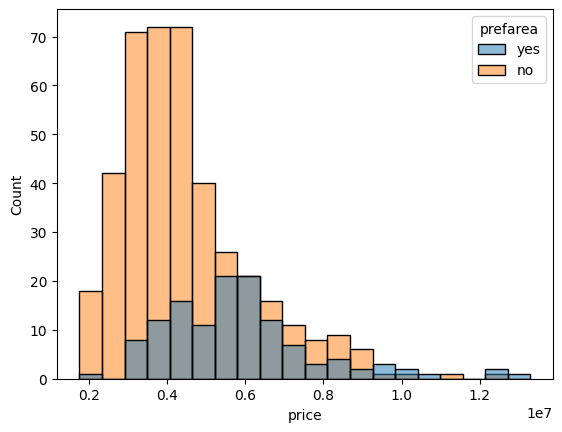

In [ ]:
sns.histplot(df,x=df['price'],hue=df['prefarea'],bins=20)

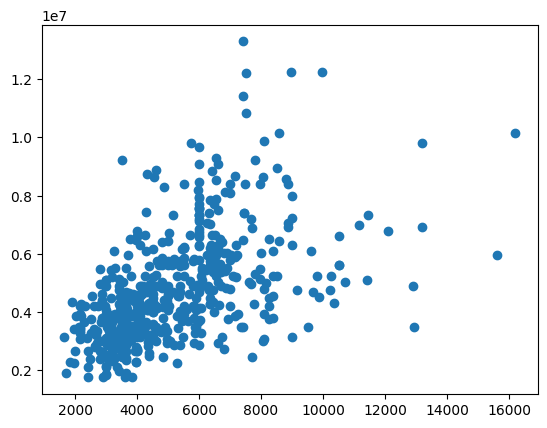

In [ ]:
x=df['area']
y=df['price']
plt.scatter(x,y)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              539 non-null    float64
 2   bedrooms          543 non-null    float64
 3   bathrooms         545 non-null    int64  
 4   stories           543 non-null    float64
 5   mainroad          544 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          543 non-null    object 
 8   hotwaterheating   543 non-null    object 
 9   airconditioning   542 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          543 non-null    object 
 12  furnishingstatus  539 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 55.5+ KB


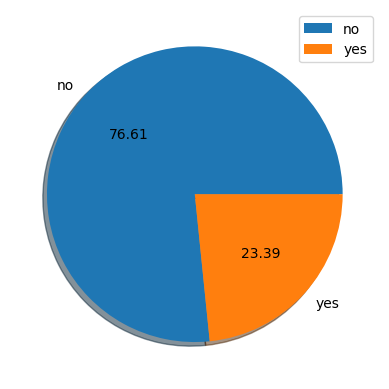

In [ ]:
plt.pie(df.prefarea.value_counts().values,labels=df.prefarea.value_counts().index,shadow = True ,autopct="%1.2f")
plt.legend()

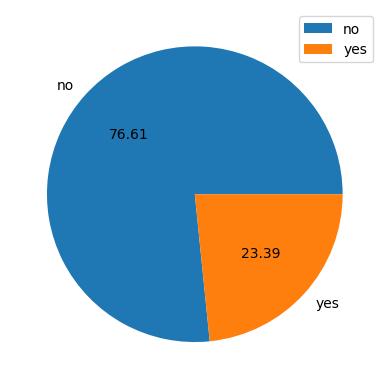

In [ ]:
plt.pie(df.prefarea.value_counts().values,labels=df.prefarea.value_counts().index,autopct="%1.2f")
plt.legend()

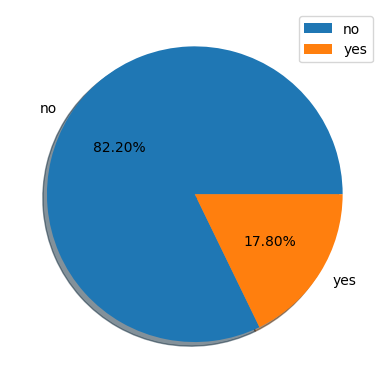

In [ ]:
plt.pie(df.guestroom.value_counts().values, labels = df.guestroom.value_counts().index, shadow = True , autopct="%1.2f%%")
plt.legend()

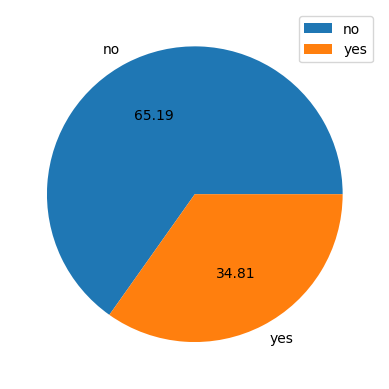

In [ ]:
plt.pie(df.basement.value_counts().values,labels=df.basement.value_counts().index,autopct="%1.2f")
plt.legend()

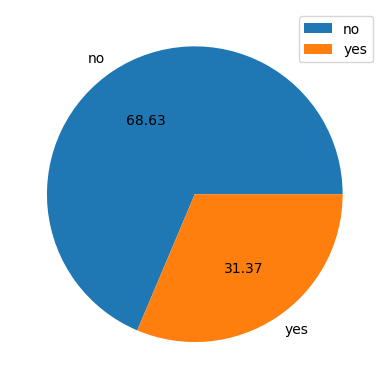

In [ ]:
plt.pie(df.airconditioning.value_counts().values,labels=df.airconditioning.value_counts().index,autopct="%1.2f")
plt.legend()

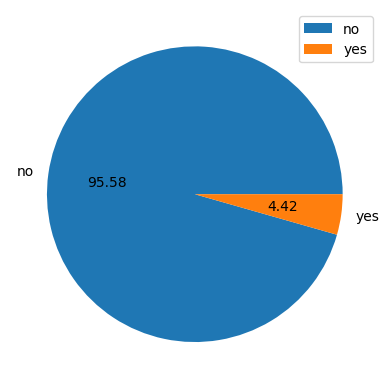

In [ ]:
plt.pie(df.hotwaterheating.value_counts().values,labels=df.hotwaterheating.value_counts().index,autopct="%1.2f")
plt.legend()

<Axes: xlabel='prefarea', ylabel='count'>

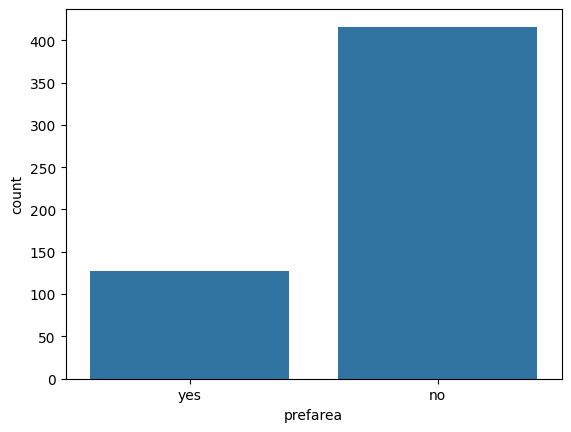

In [ ]:
sns.countplot(x='prefarea',data=df)

<Axes: xlabel='furnishingstatus', ylabel='count'>

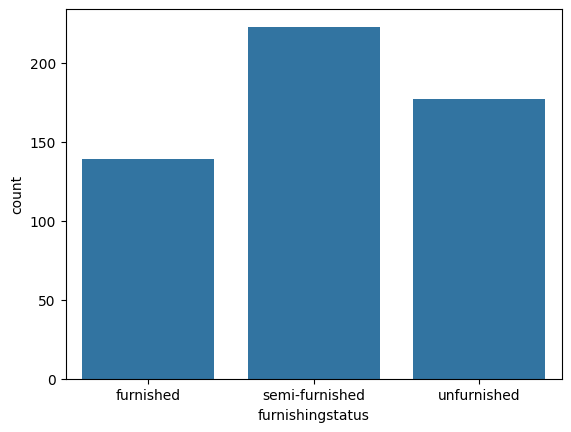

In [ ]:
sns.countplot(x='furnishingstatus',data=df)

<Axes: xlabel='hotwaterheating', ylabel='count'>

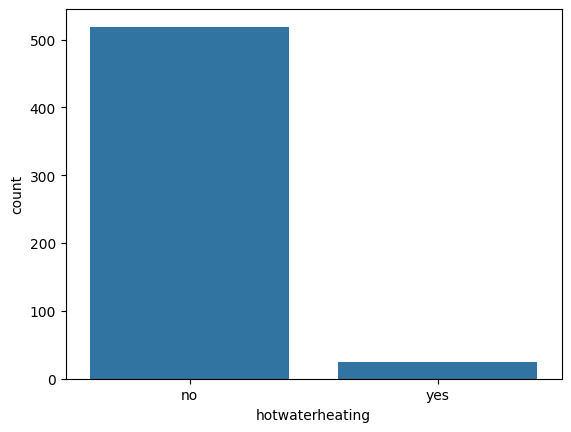

In [ ]:
sns.countplot(x='hotwaterheating',data=df)

<Axes: xlabel='airconditioning', ylabel='count'>

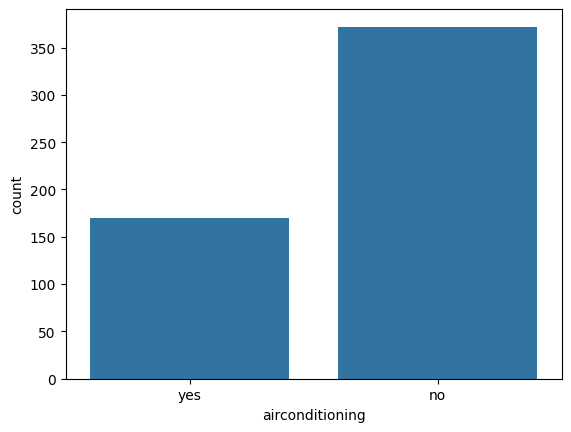

In [ ]:
sns.countplot(x='airconditioning',data=df)


<Axes: xlabel='guestroom', ylabel='count'>

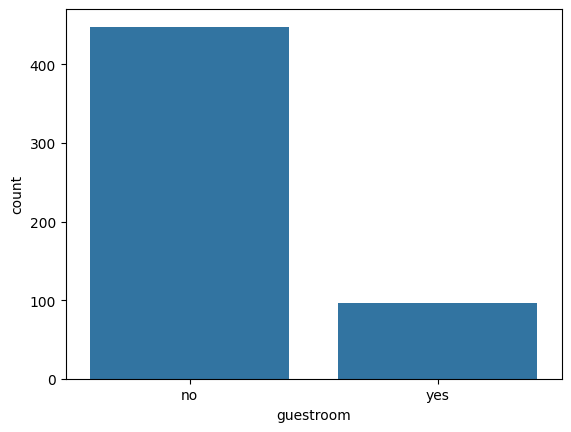

In [ ]:
sns.countplot(x='guestroom',data=df)

<Axes: xlabel='mainroad', ylabel='count'>

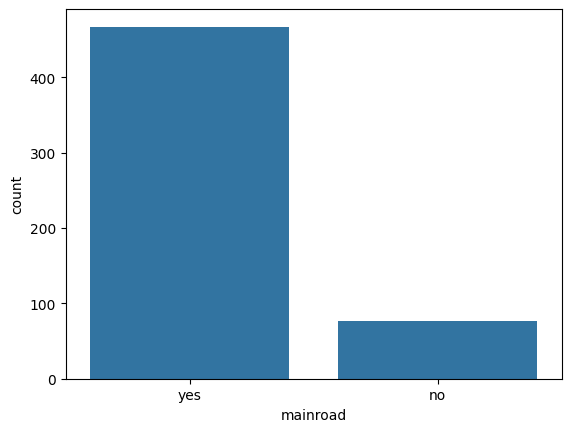

In [ ]:
sns.countplot(x='mainroad',data=df)

<Axes: xlabel='mainroad', ylabel='count'>

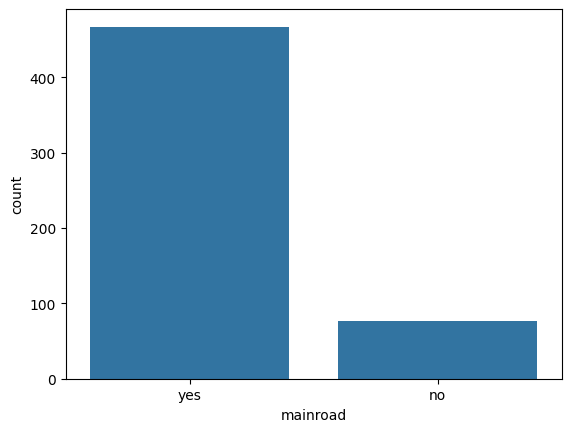

In [ ]:
sns.countplot(x='mainroad',data=df)

<Axes: xlabel='area'>

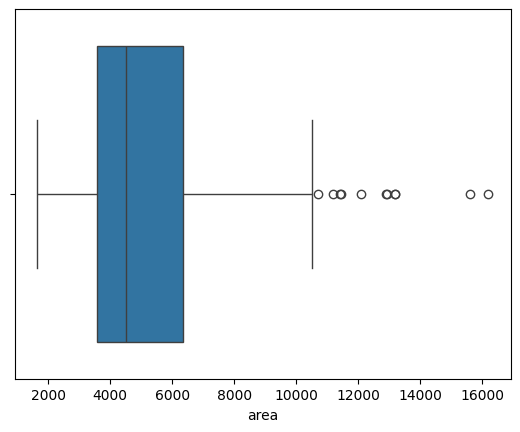

In [ ]:
sns.boxplot(x='area',data=df)

**HANDLING OUTLIERS**

In [ ]:
print(df['area'].quantile(0.10))
print(df['area'].quantile(0.90))

3000.0
7980.0


In [ ]:
df["area"]=np.where(df["area"]>7980.0,7980.0,df["area"])
df["area"]=np.where(df["area"]<3000.0,3000.0,df["area"])

<Axes: xlabel='area'>

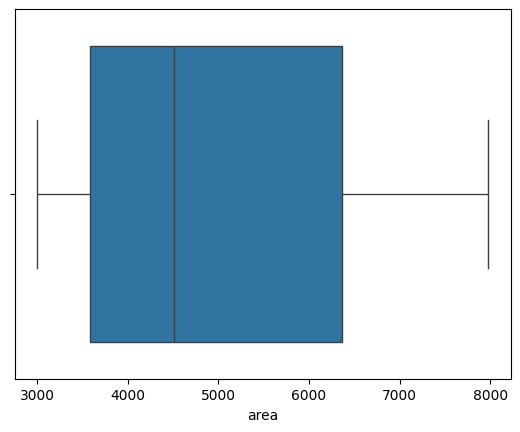

In [ ]:
sns.boxplot(x=df["area"])

In [ ]:
print(df['price'].quantile(0.10))
print(df['price'].quantile(0.90))

2835000.0
7350000.0


In [ ]:
df["price"]=np.where(df["price"]>7350000.0,7350000.0,df["price"])
df["price"]=np.where(df["price"]<2835000.0,2835000.0,df["price"])

<Axes: xlabel='price'>

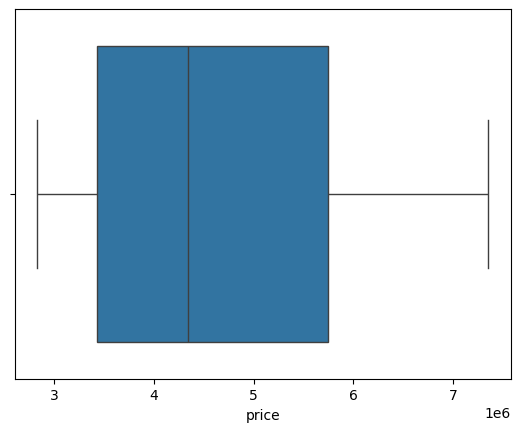

In [ ]:
sns.boxplot(x=df["price"])

<ipython-input-276-f6feec84b996>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,annot_kws={'size':15},cmap='RdBu')


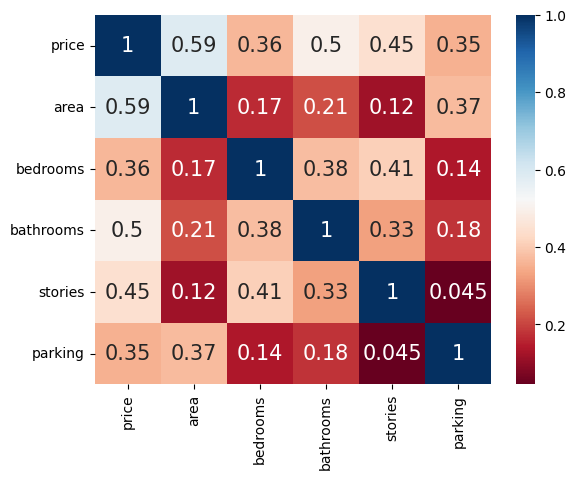

In [ ]:
sns.heatmap(df.corr(),annot=True,annot_kws={'size':15},cmap='RdBu')
plt.show()

In [ ]:
df.isna().sum()

price               0
area                6
bedrooms            2
bathrooms           0
stories             2
mainroad            1
guestroom           0
basement            2
hotwaterheating     2
airconditioning     3
parking             0
prefarea            2
furnishingstatus    6
dtype: int64

<Axes: xlabel='area', ylabel='Count'>

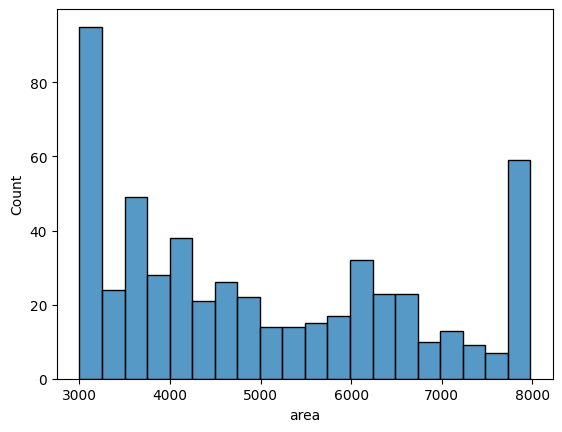

In [ ]:
sns.histplot(df,x=df["area"],bins=20)

In [ ]:
df["area"].fillna(df["area"].median(),inplace=True)

<Axes: xlabel='bedrooms', ylabel='Count'>

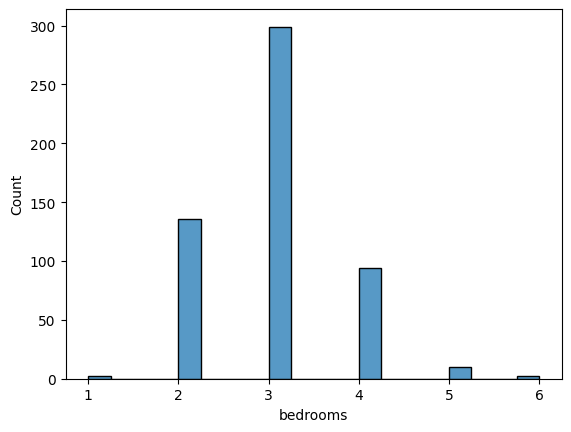

In [ ]:
sns.histplot(df,x=df["bedrooms"],bins=20)

In [ ]:
df["bedrooms"].fillna(df["bedrooms"].mean(),inplace=True)

<Axes: xlabel='stories', ylabel='Count'>

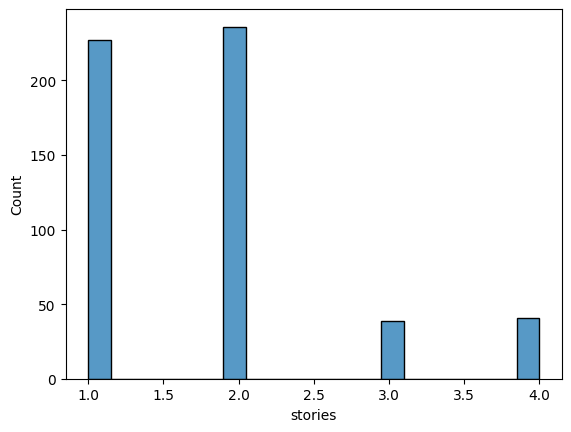

In [ ]:
sns.histplot(df,x=df["stories"],bins=20)

In [ ]:
df["stories"].fillna(df["stories"].median(),inplace=True)

In [ ]:
df["mainroad"].fillna(df["mainroad"].mode()[0],inplace=True)
df["basement"].fillna(df["basement"].mode()[0],inplace=True)
df["hotwaterheating"].fillna(df["hotwaterheating"].mode()[0],inplace=True)
df["airconditioning"].fillna(df["airconditioning"].mode()[0],inplace=True)
df["prefarea"].fillna(df["prefarea"].mode()[0],inplace=True)
df["furnishingstatus"].fillna(df["furnishingstatus"].mode()[0],inplace=True)



In [ ]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df.prefarea.value_counts()

no     418
yes    127
Name: prefarea, dtype: int64

In [ ]:
df.basement.value_counts()

no     356
yes    189
Name: basement, dtype: int64

In [ ]:
df.furnishingstatus.value_counts()

semi-furnished    229
unfurnished       177
furnished         139
Name: furnishingstatus, dtype: int64

In [ ]:
df.airconditioning.value_counts()

no     375
yes    170
Name: airconditioning, dtype: int64

In [ ]:
df.hotwaterheating.value_counts()

no     521
yes     24
Name: hotwaterheating, dtype: int64

In [ ]:
df.guestroom.value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [ ]:
df.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

**Lambda function**

In [ ]:
df['guestroom']=df.apply(lambda x: 1 if x['guestroom']=='yes' else 0 ,axis=1)
df.guestroom.value_counts()

0    448
1     97
Name: guestroom, dtype: int64

In [ ]:
df['mainroad']=df.apply(lambda x: 1 if x['mainroad']=='yes' else 0 ,axis=1)
df.mainroad.value_counts()

1    468
0     77
Name: mainroad, dtype: int64

In [ ]:
df['hotwaterheating']=df.apply(lambda x: 1 if x['hotwaterheating']=='yes' else 0 ,axis=1)
df.hotwaterheating.value_counts()

0    521
1     24
Name: hotwaterheating, dtype: int64

In [ ]:
df['basement']=df.apply(lambda x: 1 if x['basement']=='yes' else 0 ,axis=1)
df.basement.value_counts()

0    356
1    189
Name: basement, dtype: int64

In [ ]:
df['airconditioning']=df.apply(lambda x: 1 if x['airconditioning']=='yes' else 0 ,axis=1)
df.airconditioning.value_counts()

0    375
1    170
Name: airconditioning, dtype: int64

In [ ]:
df['prefarea']=df.apply(lambda x: 1 if x['prefarea']=='yes' else 0 ,axis=1)
df.prefarea.value_counts()

0    418
1    127
Name: prefarea, dtype: int64

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['furnishingstatus']= label_encoder.fit_transform(df['furnishingstatus'])
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7350000.0,7420.0,4.000000,2,3.0,1,0,0,0,1,2,1,0
1,7350000.0,7980.0,4.000000,4,4.0,1,0,0,0,1,3,0,0
2,7350000.0,7980.0,3.000000,2,2.0,1,0,1,0,0,2,1,1
3,7350000.0,7500.0,4.000000,2,2.0,1,0,1,0,1,3,1,0
4,7350000.0,7420.0,4.000000,1,2.0,1,1,0,0,1,2,0,0
5,7350000.0,7500.0,3.000000,3,1.0,1,0,1,0,1,2,1,1
6,7350000.0,7980.0,4.000000,3,4.0,1,0,0,0,1,2,1,1
7,7350000.0,7980.0,5.000000,3,2.0,1,0,0,0,0,0,0,2
8,7350000.0,7980.0,2.963168,1,2.0,1,1,1,0,1,2,1,0
9,7350000.0,5750.0,3.000000,2,4.0,1,1,0,0,1,1,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    float64
 2   bedrooms          545 non-null    float64
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    float64
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  545 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 55.5 KB


In [ ]:
X=df.drop('price',axis=1)
y=df["price"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [ ]:
from keras import models
from keras import layers

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
network = Sequential()
network.add(layers.Dense(12,activation=tf.keras.layers.LeakyReLU(alpha=0.01),bias_initializer = 'zeros',input_shape = (12,)))
network.add(layers.Dense(9,activation='relu',))
network.add(layers.Dense(6,activation='relu'))
network.add(layers.Dense(2,activation='relu'))

In [ ]:
network.add(layers.Dense(1,activation='linear'))

In [ ]:
import keras
network.compile(optimizer = 'adam',
                loss = 'mean_squared_error',
                metrics = ['mae','mse'])

In [ ]:
Y_train
Y_train = np.array(Y_train)
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_train.shape
X_train

array([[0.60240964, 0.2       , 0.        , ..., 0.33333333, 0.        ,
        0.        ],
       [0.        , 0.6       , 0.        , ..., 0.66666667, 0.        ,
        0.5       ],
       [0.12650602, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.25301205, 0.6       , 0.33333333, ..., 0.        , 0.        ,
        0.5       ],
       [0.        , 0.6       , 0.33333333, ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.6       , 0.33333333, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
network.fit(X_train,Y_train,epochs = 1000,batch_size = 32)

Epoch 1/1000
12/12 [==============================] - 1s 2ms/step - loss: 23520711016448.0000 - mae: 4623381.5000 - mse: 23520711016448.0000
Epoch 2/1000
12/12 [==============================] - 0s 3ms/step - loss: 23520711016448.0000 - mae: 4623381.5000 - mse: 23520711016448.0000
Epoch 3/1000
12/12 [==============================] - 0s 4ms/step - loss: 23520708919296.0000 - mae: 4623381.5000 - mse: 23520708919296.0000
Epoch 4/1000
12/12 [==============================] - 0s 3ms/step - loss: 23520706822144.0000 - mae: 4623381.0000 - mse: 23520706822144.0000
Epoch 5/1000
12/12 [==============================] - 0s 3ms/step - loss: 23520706822144.0000 - mae: 4623381.0000 - mse: 23520706822144.0000
Epoch 6/1000
12/12 [==============================] - 0s 2ms/step - loss: 23520702627840.0000 - mae: 4623381.0000 - mse: 23520702627840.0000
Epoch 7/1000
12/12 [==============================] - 0s 3ms/step - loss: 23520702627840.0000 - mae: 4623380.0000 - mse: 23520702627840.0000
Epoch 8/1000


In [ ]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 12)                156       
                                                                 
 dense_6 (Dense)             (None, 9)                 117       
                                                                 
 dense_7 (Dense)             (None, 6)                 60        
                                                                 
 dense_8 (Dense)             (None, 2)                 14        
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 350 (1.37 KB)
Trainable params: 350 (1.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred = network.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.6316613903586157

In [ ]:
from sklearn.metrics import explained_variance_score

y_pred = network.predict(X_test)

print('Variance Regression Score: ',explained_variance_score(Y_test,y_pred))

6/6 [==============================] - 0s 2ms/step
Variance Regression Score:  0.6362572371846632
